## Introduction to the Project

### Information on Kaggle
Link: https://www.kaggle.com/datasets/mattop/video-games-released-in-2022


## Contents

PASS


## Learning Objectives

PASS


## Contribution & Support
PASS

In [1]:
# Import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some seaborn settings
sns.set_style("white")

# Define the colors for the plots
colors = ["salmon", "lightblue"]

In [2]:
# Load the data via GITHUB raw file link
data_link = "https://raw.githubusercontent.com/muhammadanas0716/Machine-Learning-101/main/Projects/(EDA)%20Video%20Games%20Released%20in%202022/video-games-2022.csv"
df_games = pd.read_csv(data_link)

## Some basic information about our dataset
1. First & last 5 rows of our dataset
2. Some description
3. Some numerical information

In [3]:
df_games.head()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games
1,JANUARY,3,Putt-Putt Travels Through Time,NS,Adventure,Humongous Entertainment,UFO Interactive Games
2,JANUARY,4,Deep Rock Galactic,"PS4, PS5",First-person shooter,Ghost Ship Games,Coffee Stain Publishing
3,JANUARY,4,The Pedestrian,"XBO, XSX","Puzzle, platform",Skookum Arts LLC,Skookum Arts LLC
4,JANUARY,6,Demon Gaze Extra,"NS, PS4",Role-playing,Cattle Call,Clouded Leopard Entertainment


In [4]:
df_games.tail()

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
982,DECEMBER,22,Uta no Prince-sama All Star After Secret,NS,Visual novel,Nippon Ichi Software,Broccoli
983,DECEMBER,22,Valkyrie Profile: Lenneth,"PS4, PS5",Role-playing,tri-Ace,Square Enix
984,DECEMBER,22,Naraka: Bladepoint,XBO,"Action-adventure, battle royale",Thunder Fire Universe X Studio,NetEase Games
985,DECEMBER,23,Sports Story,NS,"Adventure, sports",Sidebar Games,Sidebar Games
986,DECEMBER,28,Hyper Gunsport,"PS4, PS5",Action,Necrosoft Games,Necrosoft Games


In [5]:
# Shape of the dataset
df_games.shape

(987, 7)

Means that there are 987 rows (instances) and 7 columns (features/predicators)

In [6]:
df_games.describe()

,Day
count,987.000000
mean,16.599797
std,8.814457
min,1.000000
25%,10.000000
50%,17.000000
75%,24.000000
max,31.000000


The only numerical column is the ***day*** column.

This shows us that the average day when the game was released was 16th of some month. With ***most*** games being launced before 24th of the month. 

In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Month         987 non-null    object
 1   Day           987 non-null    int64 
 2   Title         987 non-null    object
 3   Platform(s)   987 non-null    object
 4   Genre(s)      987 non-null    object
 5   Developer(s)  987 non-null    object
 6   Publisher(s)  987 non-null    object
dtypes: int64(1), object(6)
memory usage: 54.1+ KB


This shows us the following:
1. No Null/Missing values
2. Only one ***integer*** column, else are ***objects/strings***
3. Memory usage is aout 54 KB (Dunno why knowing this is necessary)

# Column Exploration
1. Some value counts of the columns
2. Basic inferenced made without any relations whatsoever

### 1. Most common month for release of games

In [8]:
df_games.head(1)

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
0,JANUARY,3,Freddi Fish 3: The Case of the Stolen Conch Shell,NS,Adventure,Humongous Entertainment,UFO Interactive Games


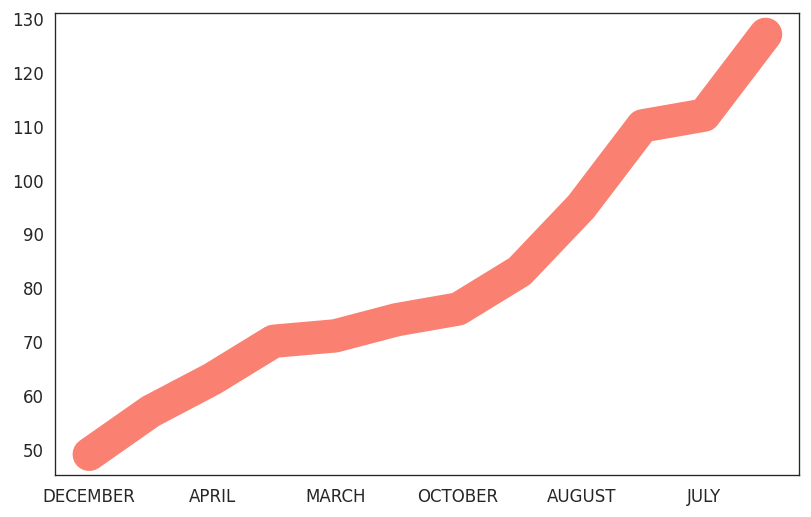

In [27]:
plt.figure(figsize=(8, 5), dpi=120)
df_games["Month"].value_counts(ascending=True).plot(linewidth=20, color=colors);

### 2. Top 10 days for the releasing of games

In [10]:
df_games.sort_values(by="Day", inplace=True)
df_games.reset_index(inplace=True)
df_games.drop("index", axis=1, inplace=True)

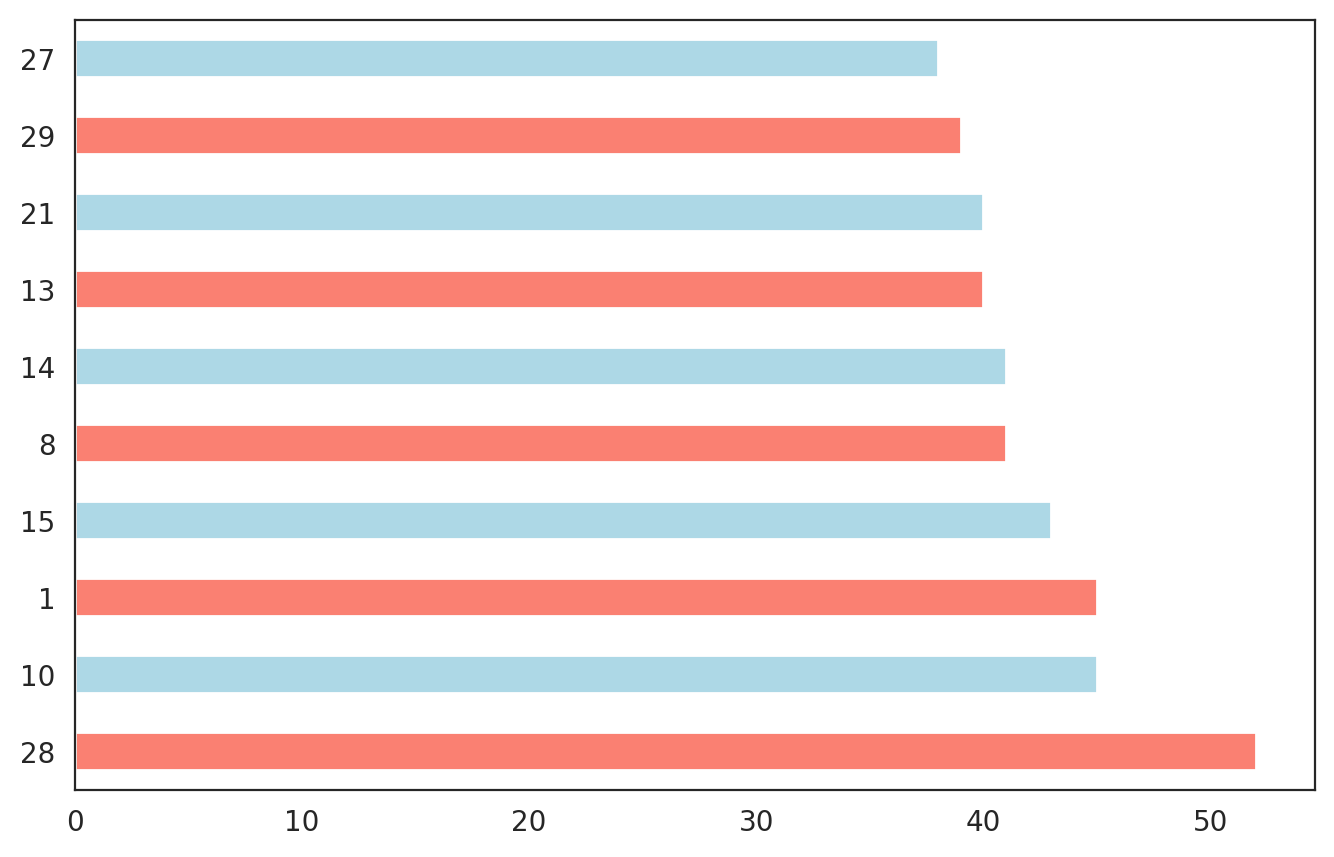

In [26]:
plt.figure(figsize=(8, 5), dpi=200)
df_games["Day"].value_counts(ascending=False).nlargest(10).plot(kind="barh", color=colors);

### 3. What are the most popular/used platforms?

In [12]:
df_games["Platform(s)"].value_counts()

NS                                184
Win                               125
Win, NS, PS4, PS5, XBO, XSX        64
Win, PS4, PS5, XBO, XSX            48
PS4, PS5                           35
                                 ... 
NS, iOS, Droid                      1
Win, XSX                            1
Win, PS4, PS5, XBO, XSX, NS         1
Win, NS, PS4, XBO, XSX, Stadia      1
Win, Mac, XSX, iOS, Droid           1
Name: Platform(s), Length: 102, dtype: int64

We have a column by the name of `Platforms(s)`, which in raw shape (as it is) is very useless. Most of them are repetitive. Let's try to extract the possible number of `Platforms`. 

In [13]:
# Import the Counter Collection
from collections import Counter

# Make the needed list for platforms and the dictionary for storing the platform count
platforms = []
platform_counts = {}

# Create a list with all the platforms possible
for row in df_games["Platform(s)"]:
    platforms.append(row)

# Strip the commas and add each indivitual word as an independent item in the list
platforms_total = [i.strip() for word in platforms for i in word.split(",")]

# Get the total count a platform is repeated
platform_counts = Counter(platforms_total)

# Get the unique elements and their counts into a dataframe
platforms = pd.DataFrame.from_dict(platform_counts, orient='index', columns=['count']).reset_index()
platforms.columns = ['letter','count']
platforms.drop(14, axis=0, inplace=True)
platforms.drop(11, axis=0, inplace=True)

# Show the DataFrame
platforms

,letter,count
0,NS,490
1,Win,487
2,PS4,404
3,iOS,54
4,Droid,44
5,XBO,304
6,PS5,317
7,XSX,284
8,Stadia,46
9,Lin,32


The most popular platform out there is Nitendo Switch....funny if you ask me. Followed by Windows and PS4

### 4. What are the common Genre(s) of the games released?

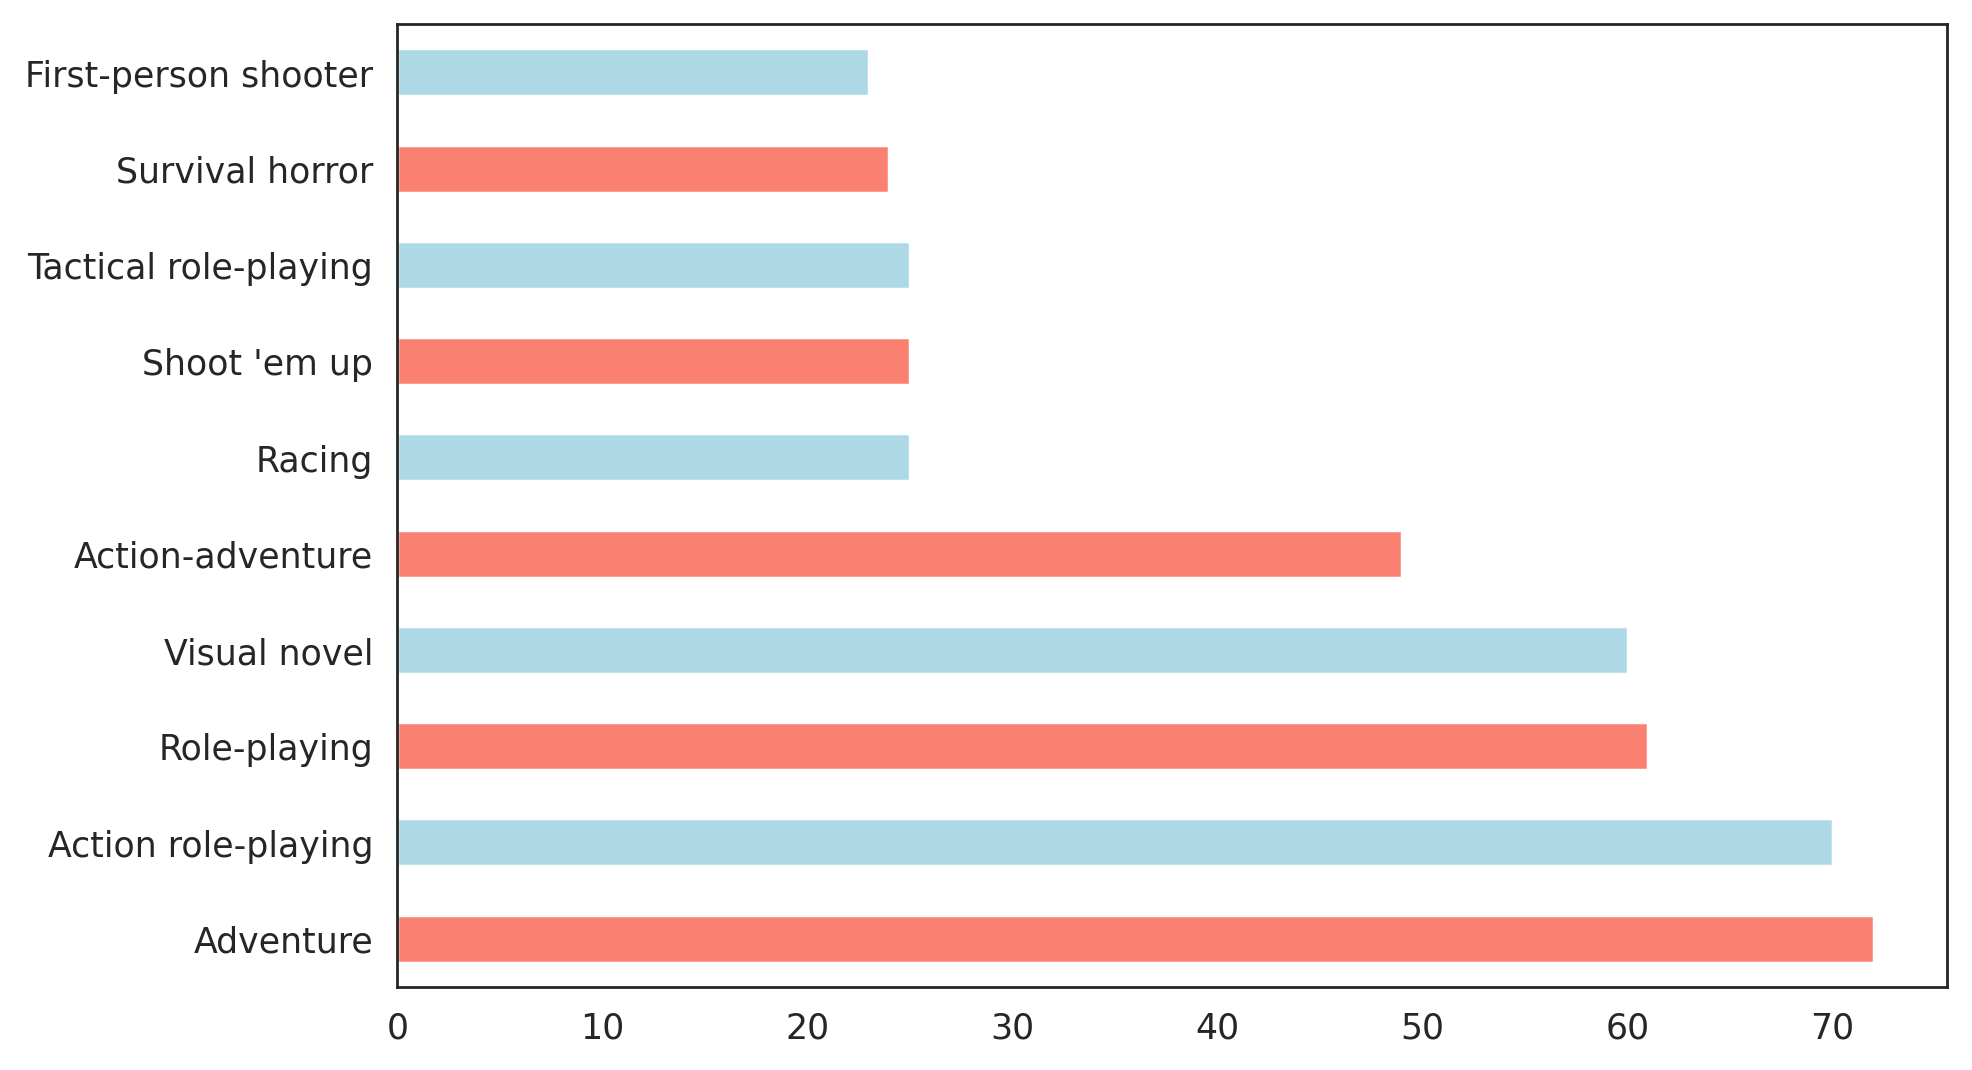

In [28]:
plt.figure(figsize=(8, 5), dpi=250)
df_games["Genre(s)"].value_counts().nlargest(10).plot(kind="barh", color=colors);

The most common `Genere(s)` for the games seem to be `First Person Shooter`, followed by `Survival Horror` and `Tactical Role Playing`.

Game Glossary:

1. **First Person Shooter**: A first-person shooter (FPS) is a type of video game where you see and control the game through the eyes of the character you are playing. The game is fast-paced and you have to move through different levels while shooting enemies with different types of weapons. You can find a variety of weapons and power-ups in these games, and you have to defeat different types of enemies to advance in the game. **Examples** of FPS games are `Halo`, `Call of Duty`, and `Doom`.

2. **Survival Horror**: Survival horror games are a type of video games that focus on the player's survival. The player is usually in a weak or vulnerable position and must fight or avoid enemies to survive in a dangerous environment. These games usually have limited resources, like weapons and ammo. The player must use smart thinking and solving puzzles to progress in the game. These games often create a feeling of fear and tension, and the player is often outnumbered and outmatched by the enemies they face. Some **examples** of popular survival horror games are `Resident Evil`, `Silent Hill`, and `Alien: Isolation`.

3. **Tactical Role Playing**: Tactical role-playing games (TRPGs) are a type of video game that combines elements of traditional role-playing games and tactical games. These games focus on tactical combat and character development, often featuring turn-based combat, character customization, and a story-driven narrative. **Examples** of TRPGs include `Fire Emblem`, `XCOM`, and `Final Fantasy Tactics`.

### 5. Who are the TOP 10 devlopers of these games (made in 2022)?

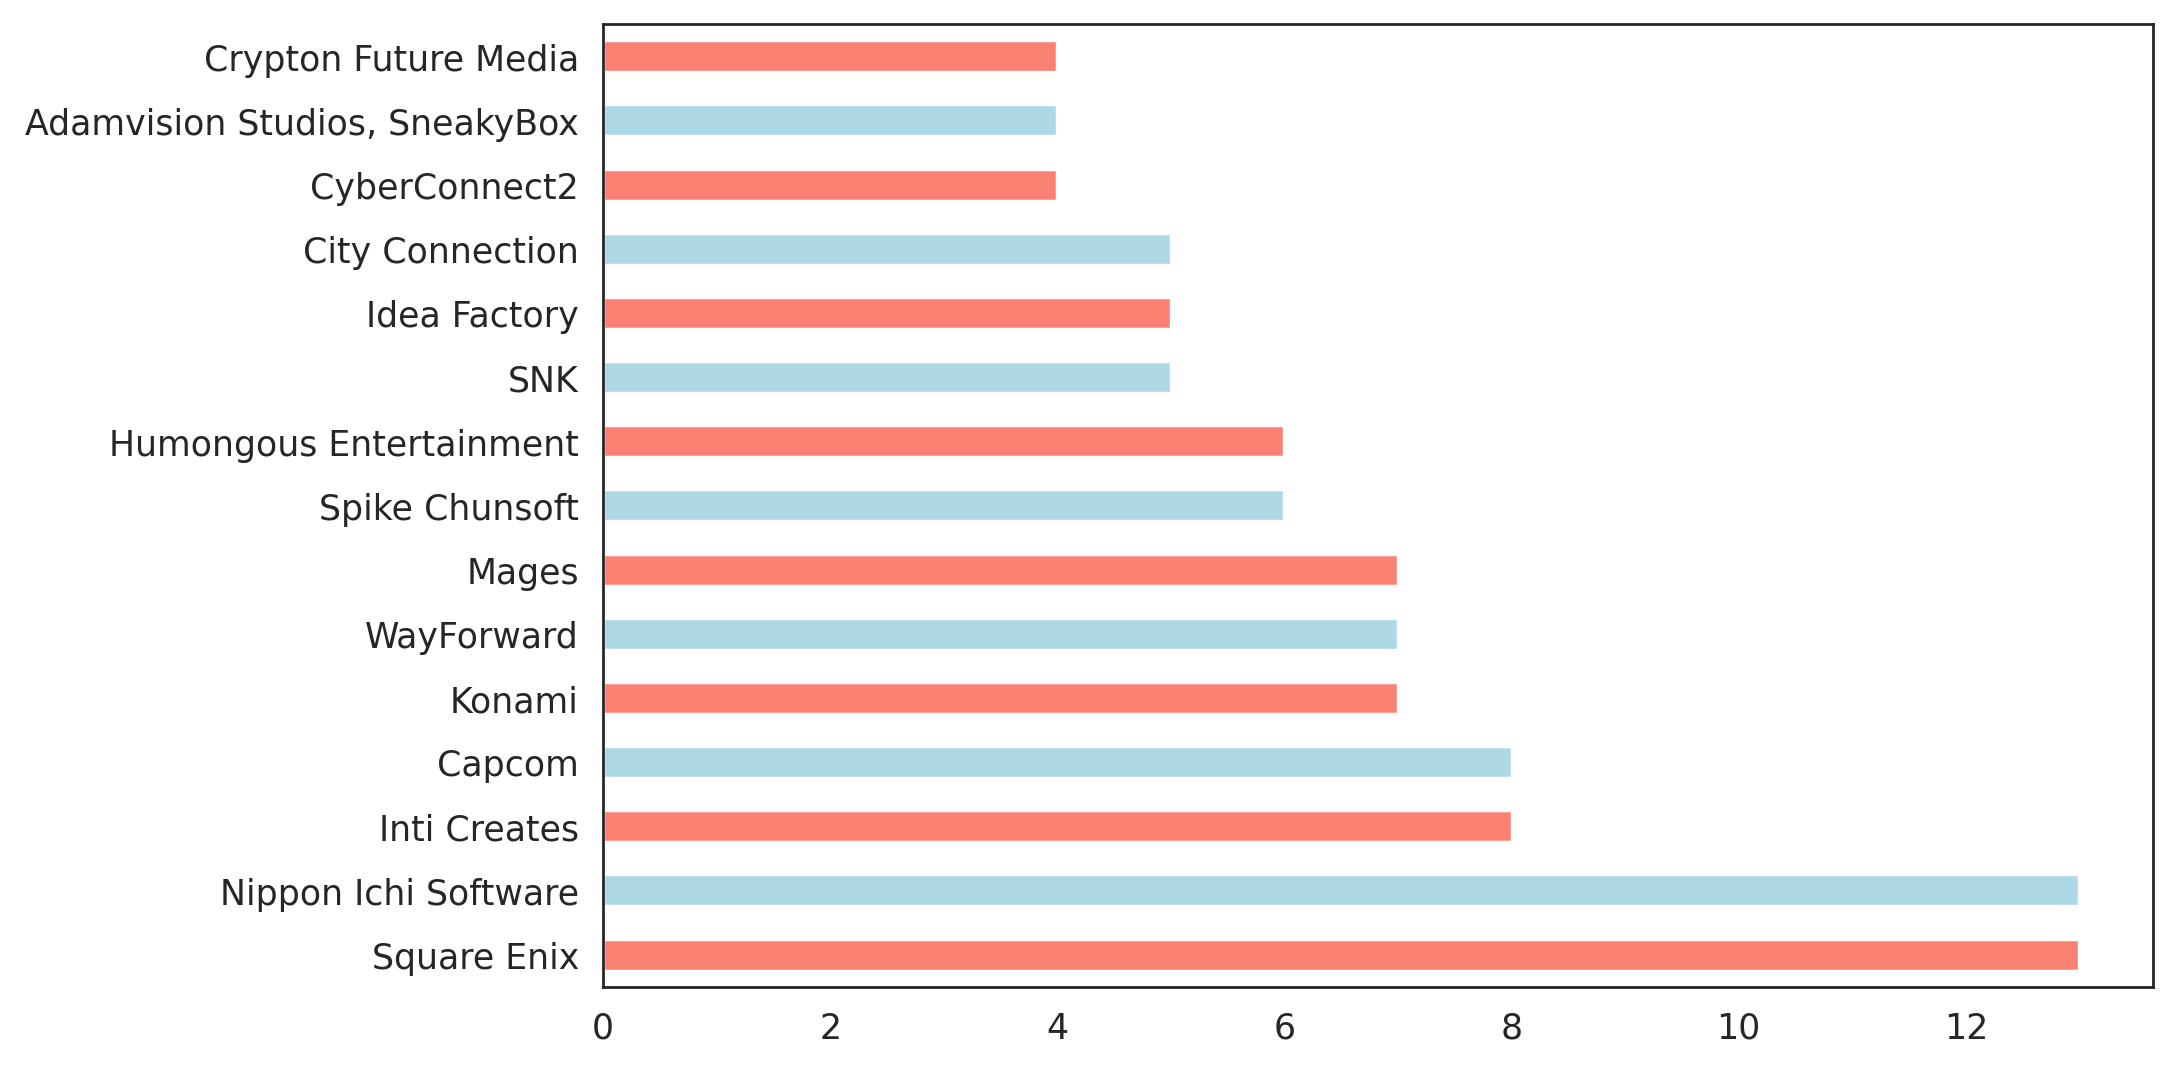

In [29]:
plt.figure(figsize=(8, 5), dpi=250)
df_games["Developer(s)"].value_counts().nlargest(15).plot(kind="barh", color=colors);

`Square Enix` takes the lead, succeeded by `Nippon Ichi Software`.

Gamey Gloassay:

1. **Square Enix**: **Square Enix** is a Japanese video game development and publishing company. The company was formed in 2003 as a result of the merger between Square Co., Ltd. and Enix Corporation. **Square Enix** is best known for its role-playing video game franchises, including the Final Fantasy series and the Dragon Quest series. The company also publishes and develops games in other genres such as action, fighting, and tactical role-playing games. Square Enix has published and developed popular franchises such as `Kingdom Hearts`, `Chrono Trigger` and the `Mana series`. 

2. **Nippon Ichi Software**: **Nippon Ichi Software, Inc**. is a Japanese video game developer and publisher based in Gifu, Japan. The company was founded in 1991 and is known for developing and publishing a wide range of video games, including strategy RPGs, tactical RPGs, and adventure games. **Nippon Ichi Software** is known for its Disgaea series of strategy RPGs, which features a unique battle system and a strong emphasis on character customization. The company also published and developed other popular games such as `Phantom Brave`, `Makai Kingdom`, and `Z.H.P`. `Unlosing Ranger VS Darkdeath Evilman`. In addition to video games, **Nippon Ichi Software** also produces and publishes anime, manga and light novels. The company is also involved in the production of mobile games, as well as porting their games on consoles.

### 6. Most popular Publishers of the games released in 2022

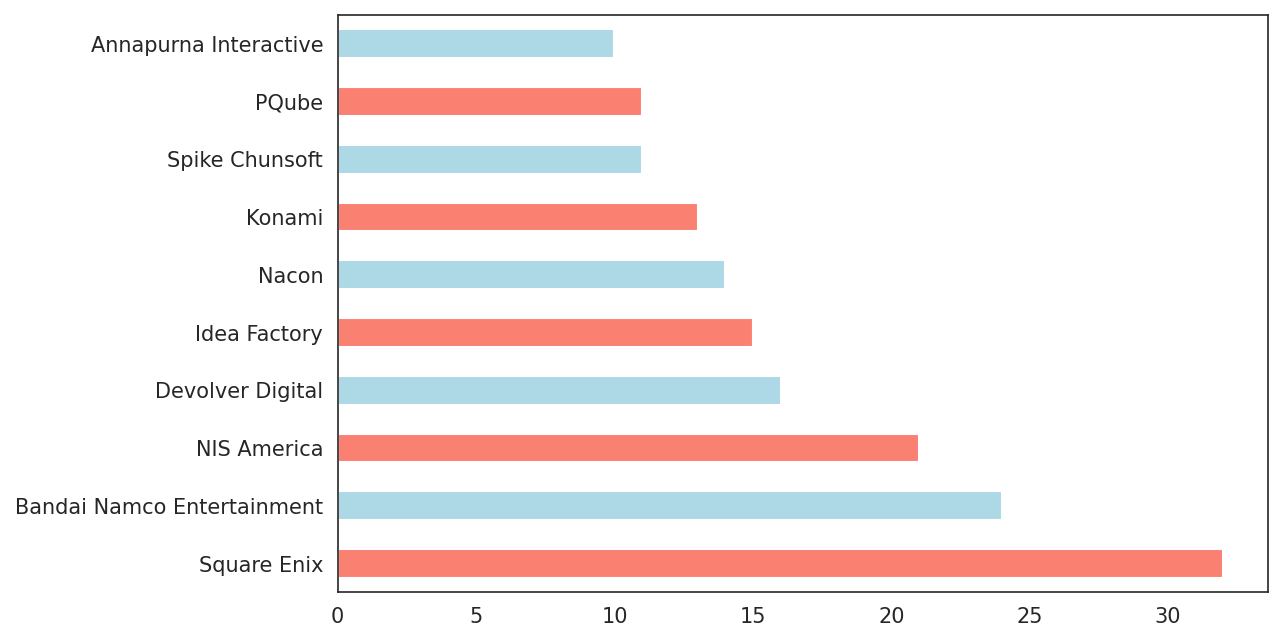

In [30]:
plt.figure(figsize=(8, 5), dpi=150)
df_games["Publisher(s)"].value_counts().nlargest(10).plot(kind="barh", color=colors);

Seems like `Square Enix` wins again as a publisher as well, succeeded by `Bandi Namco Entertainment` and `NIS America`.

Gamish Glossary:

1. **Square Enix:** **Square Enix** is a Japanese video game development and publishing company. The company was formed in 2003 as a result of the merger between Square Co., Ltd. and Enix Corporation. **Square Enix** is best known for its role-playing video game franchises, including the Final Fantasy series and the Dragon Quest series. The company also publishes and develops games in other genres such as action, fighting, and tactical role-playing games. Square Enix has published and developed popular franchises such as `Kingdom Hearts`, `Chrono Trigger` and the `Mana series`. 

2. **Bandi Namco Entertainment:** **BANDAI NAMCO Entertainment Inc.** is a Japanese video game developer and publisher. They are known for creating and publishing a wide variety of games across multiple platforms, including consoles, mobile devices, and PC. Some of their most popular franchises include `Pac-Man`, `Tekken`, `Soulcalibur`, and `Ace Combat`. They also have a strong presence in the mobile gaming market with titles like `Dragon Ball Z Dokkan Battle` and `One Piece Treasure Cruise.` **BANDAI NAMCO Entertainment** also publishes games from other developers and partners with companies such as Nintendo, Microsoft, and Sony to bring their games to a wider audience. They are one of the **LARGEST** video game publishers in Japan and have offices around the world.

3. **NIS America:** **NIS America** is a video game publisher and localization company based in California, a subsidiary of **Nippon Ichi Software**. They specialize in bringing Japanese games to the western market, and are known for publishing niche titles and games such as tactical RPG's, visual novels, and other types of games. They also publish anime and manga in the US and have a division that focuses on publishing and localizing games in the PAL region (`The PAL region is a television publication territory that covers most of Europe and Africa, alongside parts of Asia, South America and Oceania`). Their mission is to bring the best of Japanese entertainment to the Western market and they are known for their high-quality localization. Some of their popular titles include `Disgaea`, `Danganronpa`, and `The Legend of Heroes`.




Well **Japan** seems to be dominating the gaming industry for sure, atleast that is what happened in 2022! Let's see if they maintain their position in 2023, or maybe **Meta's**, `MetaVerse` might dystroy it (highly doubt it).

# In Depth Analysis, and Finding some Trends within the Data

In [31]:
df_games.head(1)

,Month,Day,Title,Platform(s),Genre(s),Developer(s),Publisher(s)
0,APRIL,1,Crystar,NS,Action role-playing,Gemdrops,NIS America


### Popularity within the Year!

In [85]:
# Group the data by 'Month' and 'Genre(s)'
grouped_genres = df_games.groupby(['Month', 'Genre(s)'])['Title'].count().reset_index()

# Print the grouped data
indices = pd.DataFrame(grouped_platforms["Title"].nlargest(5)).index
selected_rows = grouped_genres.iloc[indices].sort_values(by="Title", ascending=False)

# Output the DataFrame
selected_rows

,Month,Genre(s),Title
86,AUGUST,Role-playing,5
140,FEBRUARY,First-person shooter,3
172,JANUARY,"Digital collectible card game, strategy",2
330,MARCH,Kart racing,1
151,FEBRUARY,"Roguelike, deck-building",1


**Analysis:**
We can see that `Feb` has some decent publishing games.

From this we can infer that most games are released in the early months of the year, maybe so they can get an edge in the gaming industry, or maybe as a new product launch for the year that is following (i.e 2022).



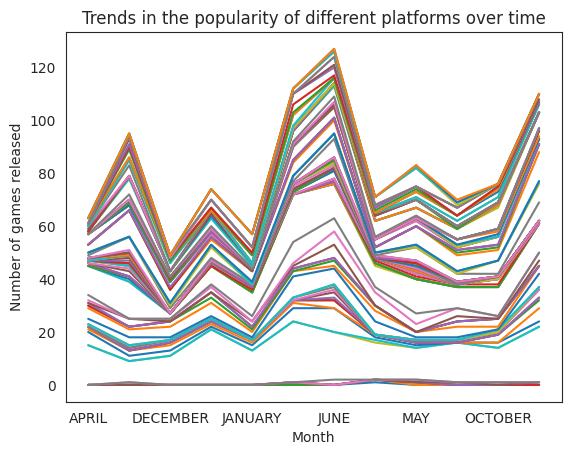

In [96]:
df_games.groupby(['Month', 'Platform(s)']).size().unstack().plot(kind='line', stacked=True)
plt.xlabel("Month")
plt.ylabel("Number of games released")
plt.title("Trends in the popularity of different platforms over time")
plt.legend().set_visible(False)

**Analysis**:

Haha, I know - a very messy chart you may say, but we just need the big picture. This (absurd, un-understandable) plot suggests that most platforms gained popularity, in around about the month ***`June`***, and this is for all most platforms, however a decent number are still aren't popular, and these aren't popular anything during the year anyways.

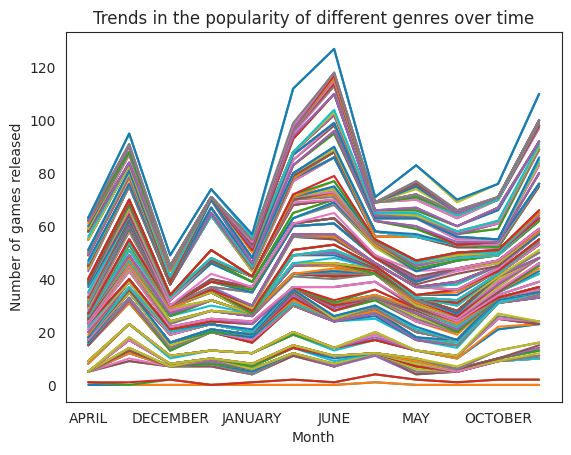

In [100]:
df_games.groupby(['Month', 'Genre(s)']).size().unstack().plot(kind='line', stacked=True)
plt.xlabel("Month")
plt.ylabel("Number of games released")
plt.title("Trends in the popularity of different genres over time")
plt.legend().set_visible(False)

**Analysis:**

Well, again very similar to above chart. Mostly genre(s) skyrocket in the month of ***`June`***

Such data plot(s) suggest that there is a significant event or factor that is influencing the popularity of games during that time. Possible explanations could include a major gaming conference or expo taking place in ***`June`***, or maybe an increase in consumer spending during the summer months. Further analysis and research would be needed to determine the specific cause of the correlation.